### Analysis/Detections on additional pixels:
- Start date: 24/08/23
- End date  : 

With the updated .txt Marcin uploaded on nimbus 2, on 24/08/23
FRB Searches!

#### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import time as ptime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
# import io_fits
import time
import sys
import pandas as pd
# Importing fits library for viewing the images 
from astropy.io import fits

# For visualisations and creating graphs
import seaborn as sns

# In order to plot the curves
from scipy.stats import norm

# In order to create animations from these histograms
import matplotlib.animation as animation

# In order to go through contents present on my desktop 
import os

# In order to use the DBSCAN function
from sklearn.cluster import DBSCAN

# For animation
from matplotlib.animation import FuncAnimation

# For having discrete colours in the legend
import matplotlib.colors as mcolors

# For colour-coding the histograms
from matplotlib.colors import Normalize, LogNorm

In [2]:
# Mention the file path of the .txt file 
file_path = '/home/gayatri/Downloads/Updated_Candidates_240823/new_data1c_modified.xlsx'

# Load the .txt file into a DataFrame with predefined column names
df = pd.read_excel(file_path)

In [3]:
df

,Unnamed: 0,INDEX,SNR,DM,TIMESTAMP,X,Y,DTM,COUNT_MERGED
0,NaN,0,5.39,3,592,50,148,20230601_100213_100ms_ch294,1
1,NaN,1,6.81,5,592,52,84,20230601_100213_100ms_ch294,1
2,NaN,2,5.10,5,591,52,148,20230601_100213_100ms_ch294,1
3,NaN,3,6.26,5,592,54,51,20230601_100213_100ms_ch294,2
4,NaN,4,5.37,5,592,54,73,20230601_100213_100ms_ch294,1
...,...,...,...,...,...,...,...,...,...
3721,NaN,3721,5.03,5,597,146,57,20230601_104736_100ms_ch294,1
3722,NaN,3722,5.22,5,597,147,52,20230601_104736_100ms_ch294,1
3723,NaN,3723,5.57,4,597,148,110,20230601_104736_100ms_ch294,2
3724,NaN,3724,5.52,4,597,148,90,20230601_104736_100ms_ch294,2


In [4]:
# Dropped un-necessary columns to make 
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='INDEX', inplace=True)

# Display the updated dataframe 
df

,SNR,DM,TIMESTAMP,X,Y,DTM,COUNT_MERGED
0,5.39,3,592,50,148,20230601_100213_100ms_ch294,1
1,6.81,5,592,52,84,20230601_100213_100ms_ch294,1
2,5.10,5,591,52,148,20230601_100213_100ms_ch294,1
3,6.26,5,592,54,51,20230601_100213_100ms_ch294,2
4,5.37,5,592,54,73,20230601_100213_100ms_ch294,1
...,...,...,...,...,...,...,...
3721,5.03,5,597,146,57,20230601_104736_100ms_ch294,1
3722,5.22,5,597,147,52,20230601_104736_100ms_ch294,1
3723,5.57,4,597,148,110,20230601_104736_100ms_ch294,2
3724,5.52,4,597,148,90,20230601_104736_100ms_ch294,2


In [5]:
# Extract the Time_Step value as it's numeric and assign it to a new column
df['Extracted_Time_Step'] = df['DTM'].str.extract(r'_(\d+)_')

# Display the updated dataframe 
df

,SNR,DM,TIMESTAMP,X,Y,DTM,COUNT_MERGED,Extracted_Time_Step
0,5.39,3,592,50,148,20230601_100213_100ms_ch294,1,100213
1,6.81,5,592,52,84,20230601_100213_100ms_ch294,1,100213
2,5.10,5,591,52,148,20230601_100213_100ms_ch294,1,100213
3,6.26,5,592,54,51,20230601_100213_100ms_ch294,2,100213
4,5.37,5,592,54,73,20230601_100213_100ms_ch294,1,100213
...,...,...,...,...,...,...,...,...
3721,5.03,5,597,146,57,20230601_104736_100ms_ch294,1,104736
3722,5.22,5,597,147,52,20230601_104736_100ms_ch294,1,104736
3723,5.57,4,597,148,110,20230601_104736_100ms_ch294,2,104736
3724,5.52,4,597,148,90,20230601_104736_100ms_ch294,2,104736


In [6]:
# In order to view the data-type of each of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SNR                  3726 non-null   float64
 1   DM                   3726 non-null   int64  
 2   TIMESTAMP            3726 non-null   int64  
 3   X                    3726 non-null   int64  
 4   Y                    3726 non-null   int64  
 5   DTM                  3726 non-null   object 
 6   COUNT_MERGED         3726 non-null   int64  
 7   Extracted_Time_Step  3726 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 233.0+ KB


In [7]:
# Changing the data-type of Extracted Time Step to "float" for further calculations 
df['Extracted_Time_Step'] = df['Extracted_Time_Step'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SNR                  3726 non-null   float64
 1   DM                   3726 non-null   int64  
 2   TIMESTAMP            3726 non-null   int64  
 3   X                    3726 non-null   int64  
 4   Y                    3726 non-null   int64  
 5   DTM                  3726 non-null   object 
 6   COUNT_MERGED         3726 non-null   int64  
 7   Extracted_Time_Step  3726 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 233.0+ KB


In [9]:
# Renaming DM to DM-Index
df.rename(columns={'DM': 'DM Index'}, inplace=True)

# View the updated data-frame 
df

,SNR,DM Index,TIMESTAMP,X,Y,DTM,COUNT_MERGED,Extracted_Time_Step
0,5.39,3,592,50,148,20230601_100213_100ms_ch294,1,100213.0
1,6.81,5,592,52,84,20230601_100213_100ms_ch294,1,100213.0
2,5.10,5,591,52,148,20230601_100213_100ms_ch294,1,100213.0
3,6.26,5,592,54,51,20230601_100213_100ms_ch294,2,100213.0
4,5.37,5,592,54,73,20230601_100213_100ms_ch294,1,100213.0
...,...,...,...,...,...,...,...,...
3721,5.03,5,597,146,57,20230601_104736_100ms_ch294,1,104736.0
3722,5.22,5,597,147,52,20230601_104736_100ms_ch294,1,104736.0
3723,5.57,4,597,148,110,20230601_104736_100ms_ch294,2,104736.0
3724,5.52,4,597,148,90,20230601_104736_100ms_ch294,2,104736.0


In [10]:
# Define the desired column order
desired_column_order = ['DTM','Extracted_Time_Step', 'X', 'Y', 'SNR','TIMESTAMP', 'DM Index', 'COUNT_MERGED'] 

# Rearrange the columns in the DataFrame
df = df[desired_column_order]

# Display the DataFrame with the new column order
df[:10]

,DTM,Extracted_Time_Step,X,Y,SNR,TIMESTAMP,DM Index,COUNT_MERGED
0,20230601_100213_100ms_ch294,100213.0,50,148,5.39,592,3,1
1,20230601_100213_100ms_ch294,100213.0,52,84,6.81,592,5,1
2,20230601_100213_100ms_ch294,100213.0,52,148,5.10,591,5,1
3,20230601_100213_100ms_ch294,100213.0,54,51,6.26,592,5,2
4,20230601_100213_100ms_ch294,100213.0,54,73,5.37,592,5,1
5,20230601_100213_100ms_ch294,100213.0,55,71,6.01,591,5,1
6,20230601_100213_100ms_ch294,100213.0,57,109,5.11,566,3,1
7,20230601_100213_100ms_ch294,100213.0,57,117,5.13,592,5,1
8,20230601_100213_100ms_ch294,100213.0,59,134,7.77,592,5,2
9,20230601_100213_100ms_ch294,100213.0,61,73,5.21,591,5,1


In [11]:
# Sort the data-frame in ascending order of time-step, and further by time-stamps 
sorted_df = df.sort_values(by=['Extracted_Time_Step', 'TIMESTAMP'], ascending=[True, True])

In [12]:
sorted_df

,DTM,Extracted_Time_Step,X,Y,SNR,TIMESTAMP,DM Index,COUNT_MERGED
28,20230601_100213_100ms_ch294,100213.0,83,74,5.11,135,1,1
27,20230601_100213_100ms_ch294,100213.0,82,118,5.52,210,1,1
46,20230601_100213_100ms_ch294,100213.0,102,147,5.14,287,0,1
93,20230601_100213_100ms_ch294,100213.0,139,59,5.32,309,0,1
79,20230601_100213_100ms_ch294,100213.0,125,86,5.06,375,1,1
...,...,...,...,...,...,...,...,...
3719,20230601_104736_100ms_ch294,104736.0,143,139,5.65,597,3,2
3721,20230601_104736_100ms_ch294,104736.0,146,57,5.03,597,5,1
3722,20230601_104736_100ms_ch294,104736.0,147,52,5.22,597,5,1
3723,20230601_104736_100ms_ch294,104736.0,148,110,5.57,597,4,2


In [13]:
# Count the number of rows for each unique Extracted_Time_Step
count_per_time_step = sorted_df['DTM'].value_counts()

# There are 30 time-steps in this data, and these are the candidates corresponding to every time-step 
count_per_time_step

20230601_104217_100ms_ch294    603
20230601_103808_100ms_ch294    205
20230601_103708_100ms_ch294    183
20230601_103241_100ms_ch294    152
20230601_103608_100ms_ch294    139
20230601_104736_100ms_ch294    135
20230601_100313_100ms_ch294    116
20230601_104317_100ms_ch294    116
20230601_101512_100ms_ch294    116
20230601_103049_100ms_ch294    116
20230601_104636_100ms_ch294    114
20230601_104417_100ms_ch294    113
20230601_102701_100ms_ch294    109
20230601_101412_100ms_ch294    106
20230601_100213_100ms_ch294    102
20230601_102601_100ms_ch294    100
20230601_101118_100ms_ch294     98
20230601_101946_100ms_ch294     97
20230601_102403_100ms_ch294     96
20230601_102303_100ms_ch294     95
20230601_101018_100ms_ch294     94
20230601_100413_100ms_ch294     93
20230601_102949_100ms_ch294     92
20230601_102801_100ms_ch294     90
20230601_101218_100ms_ch294     89
20230601_102046_100ms_ch294     88
20230601_101612_100ms_ch294     71
20230601_103441_100ms_ch294     71
20230601_101846_100m

In [14]:
# Number of time-steps:
count_per_time_step.shape

(30,)

In [15]:
# Assuming count_per_time_step is the Series returned by sorted_df['DTM'].value_counts()
count_per_time_step = sorted_df['DTM'].value_counts()

# Convert the Series to a DataFrame
count_per_time_step_df = pd.DataFrame({'Time_Step': count_per_time_step.index, 'Count': count_per_time_step.values})

In [16]:
count_per_time_step_df

,Time_Step,Count
0,20230601_104217_100ms_ch294,603
1,20230601_103808_100ms_ch294,205
2,20230601_103708_100ms_ch294,183
3,20230601_103241_100ms_ch294,152
4,20230601_103608_100ms_ch294,139
5,20230601_104736_100ms_ch294,135
6,20230601_100313_100ms_ch294,116
7,20230601_104317_100ms_ch294,116
8,20230601_101512_100ms_ch294,116
9,20230601_103049_100ms_ch294,116


**Observations:**
1. There are 30 time-steps in this data-set. 
2. These time-steps have been arranged in an ascending order. 

#### Filtering out candidates, with S/N > 10:

In [17]:
# Filter out rows where 'S/N' > 10
sorted_df_SNR_10 = sorted_df[(sorted_df['SNR'] > 10)]

In [18]:
sorted_df_SNR_10.shape

(272, 8)

In [19]:
# Count the number of rows for each unique Extracted_Time_Step
count_per_time_step = sorted_df_SNR_10['DTM'].value_counts()

# There are 30 time-steps in this data, and these are the candidates corresponding to every time-step 
count_per_time_step

20230601_104217_100ms_ch294    259
20230601_103808_100ms_ch294      5
20230601_103708_100ms_ch294      4
20230601_103608_100ms_ch294      2
20230601_100213_100ms_ch294      1
20230601_103241_100ms_ch294      1
Name: DTM, dtype: int64

In [32]:
# # Specify the file path to save the Excel file
# file_path = 'data1_Updated_24-08-23_filtered_SNR_10.xlsx'

# # Save the DataFrame as an Excel file
# sorted_df_SNR_10.to_excel(file_path, index=False)

#### Filtering out candidates, with S/N > 10 & DM > 3: 

In [21]:
# Filter out rows where 'S/N' > 10
sorted_df_SNR_10_DM_3 = sorted_df[(sorted_df['SNR'] > 10) & (sorted_df['DM Index'] > 3)]

In [22]:
sorted_df_SNR_10_DM_3.shape

(1, 8)

In [23]:
# Count the number of rows for each unique Extracted_Time_Step
count_per_time_step = sorted_df_SNR_10_DM_3['DTM'].value_counts()

# There are 30 time-steps in this data, and these are the candidates corresponding to every time-step 
count_per_time_step

20230601_104217_100ms_ch294    1
Name: DTM, dtype: int64

### Histograms: 

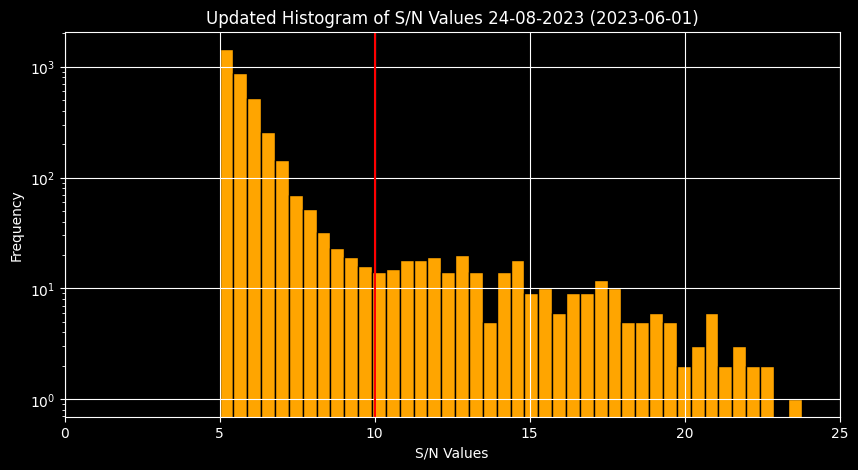

In [24]:
# Set the style to a custom dark background style
plt.style.use('dark_background')

# Set the number of bins you want 
num_bins = 50

# Plot a histogram of the filtered 'S/N' column with more bins
plt.figure(figsize=(10, 5)) 
plt.hist(sorted_df['SNR'], bins=num_bins, edgecolor='black', color='orange')
plt.xlabel('S/N Values')
plt.ylabel('Frequency')
plt.title('Updated Histogram of S/N Values 24-08-2023 (2023-06-01)')
plt.grid(True)

# Set the x-axis limits to 0 and 25
plt.xlim(0, 25)  

# Set the y-axis to log scale
plt.yscale('log')

# Add a vertical dashed red line at 10
plt.axvline(x=10, color='red', linestyle='-')  

plt.show()

What does this histogram tell me? 
- This histogram was generated from the candidates obtained after merging ensuring that we could read the RA/DEC values of the pixels could be read directly from ds9 itself. 

(From ChatGPT) 
- This histogram visualizes the distribution of Signal-to-Noise Ratio (S/N) values present in the 2023-06-01 dataset. 
- The vertical ted line is added at the S/N value of 10 on the x-axis. 
- There are around 3726 candidates, in total and around 272 candidates with S/N > 10.
- The S/N is seen to follow a gaussian distribution. 
- The number of candidates keep dropping until S/N = 10, and then they stay more or less constant from S/N = 10 onwards. 

#### Scatter Plot of S/N vs DM:

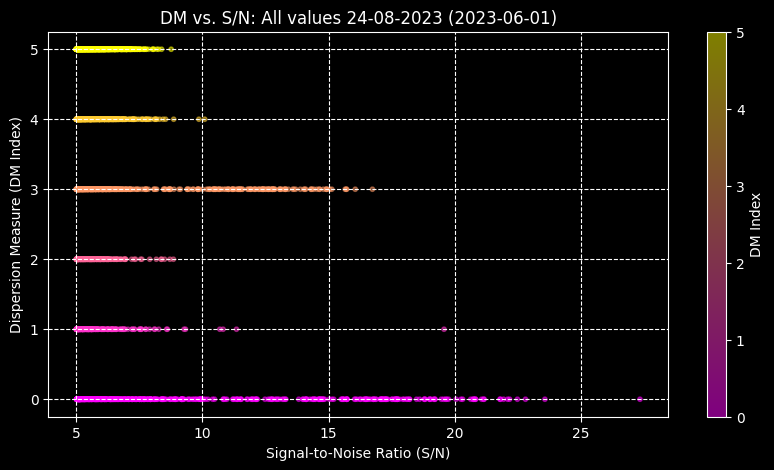

In [25]:
# Set the style to a custom dark background style
plt.style.use('dark_background')

# Set the figure size (width, height) in inches
plt.figure(figsize=(10, 5))

# Plot the scatter plot of DM vs. S/N with color coding based on DM Index values
scatter = plt.scatter(sorted_df['SNR'], sorted_df['DM Index'], c=sorted_df['DM Index'], marker='o', cmap='spring', alpha=0.5, s=10)

# Set labels and title
plt.xlabel('Signal-to-Noise Ratio (S/N)')
plt.ylabel('Dispersion Measure (DM Index)')
plt.title('DM vs. S/N: All values 24-08-2023 (2023-06-01)')
plt.grid(True, linestyle='--')

# Add colorbar for DM Index values
cbar = plt.colorbar(scatter)
cbar.set_label('DM Index')

# Show the plot
plt.show()

What does this scatter-plot tell us?
1. This is scatter-plot of the distribution of DM vs S/N values. 
2. Mosy of the high S/N candidates, with S/N > 10, have a DM-index of either 0 or 3. 
3. There are very few candidates , with S/N > 10, with high DM-indexes. 

In [26]:
# Group the data by 'DM Index' and then count the occurrences in each group
dm_index_counts = sorted_df.groupby('DM Index').size()

# Print the number of points corresponding to each DM Index
dm_index_counts

# Convert the Series to a DataFrame
dm_index_counts_df = dm_index_counts.reset_index()

# Rename the columns for clarity
dm_index_counts_df.columns = ['DM Index', 'Count']

# Print the resulting DataFrame
dm_index_counts_df

,DM Index,Count
0,0,545
1,1,242
2,2,252
3,3,596
4,4,656
5,5,1435


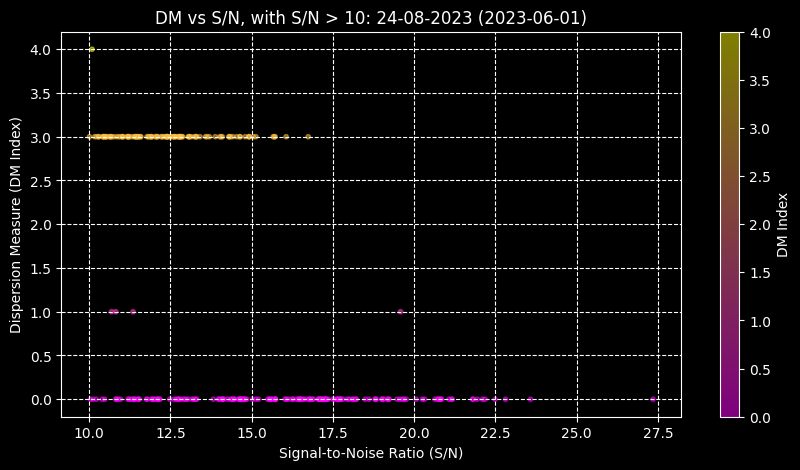

In [27]:
# Set the style to a custom dark background style
plt.style.use('dark_background')

# Set the figure size (width, height) in inches
plt.figure(figsize=(10, 5))

# Plot the scatter plot of DM vs. S/N with color coding based on DM Index values
scatter = plt.scatter(sorted_df_SNR_10['SNR'], sorted_df_SNR_10['DM Index'], c=sorted_df_SNR_10['DM Index'], marker='o', cmap='spring', alpha=0.5, s=10)

# Set labels and title
plt.xlabel('Signal-to-Noise Ratio (S/N)')
plt.ylabel('Dispersion Measure (DM Index)')
plt.title('DM vs S/N, with S/N > 10: 24-08-2023 (2023-06-01)')
plt.grid(True, linestyle='--')

# Add colorbar for DM Index values
cbar = plt.colorbar(scatter)
cbar.set_label('DM Index')

# Show the plot
plt.show()

In [28]:
# Group the data by 'DM Index' and then count the occurrences in each group
dm_index_counts = sorted_df_SNR_10.groupby('DM Index').size()

# Print the number of points corresponding to each DM Index
dm_index_counts

# Convert the Series to a DataFrame
dm_index_counts_df = dm_index_counts.reset_index()

# Rename the columns for clarity
dm_index_counts_df.columns = ['DM Index', 'Count']

# Print the resulting DataFrame
dm_index_counts_df

,DM Index,Count
0,0,161
1,1,4
2,3,106
3,4,1


### Colour coded plots from Ravi

In [29]:
# # Plot scatter plot with color coded points based on DM Index
# plt.figure(figsize=(8, 6))
# plt.scatter(sorted_df_SNR_10['X'], sorted_df_SNR_10['Y'], c=sorted_df_SNR_10['DM Index'], cmap='viridis', s=50, edgecolors='black')

# # Add colorbar for SNR values
# cbar = plt.colorbar()
# cbar.set_label('SNR')

# plt.xlabel('Pixel X')
# plt.ylabel(' Pixel Y')
# plt.title('Candidates, pixel positions (DM > 10)')
# plt.grid(True, linestyle='--')

# # Set x-axis and y-axis limits
# plt.xlim(0, 180)
# plt.ylim(0, 180)

# plt.show()

In [30]:
# # Create a 1x2 grid of subplots
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Set x-axis and y-axis limits for both subplots
# for ax in axes:
#     ax.set_xlim(0, 180)
#     ax.set_ylim(0, 180)

# # Plot Scatter Plot 1
# scatter1 = axes[0].scatter(sorted_df_SNR_10['X'], sorted_df_SNR_10['Y'], c=sorted_df_SNR_10['SNR'], cmap='Purples', s=50, edgecolors='black', marker='o')
# cbar1 = plt.colorbar(scatter1, ax=axes[0])
# cbar1.set_label('SNR')
# axes[0].set_xlabel('Pixel X')
# axes[0].set_ylabel('Pixel Y')
# axes[0].set_title('S/N > 10 & DM > 3, (2023-06-01)')
# axes[0].grid(True, linestyle='--')

# # Plot Scatter Plot 2
# scatter2 = axes[1].scatter(sorted_df_SNR_10['X'], sorted_df_SNR_10['Y'], c=sorted_df_SNR_10['DM Index'], cmap='spring', s=50, edgecolors='black', marker='o')
# cbar2 = plt.colorbar(scatter2, ax=axes[1])
# cbar2.set_label('DM Index')
# axes[1].set_xlabel('Pixel X')
# axes[1].set_ylabel('Pixel Y')
# axes[1].set_title('S/N > 10 & DM > 3, (2023-06-01)')
# axes[1].grid(True, linestyle='--')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plots
# plt.show()

In [31]:
# # Specify the file path to save the Excel file
# file_path = 'data1_filtered.xlsx'

# # Save the DataFrame as an Excel file
# filtered_df.to_excel(file_path, index=False)